# Regression

In regression, we want to predict a continuous value, such as the price of a property, the height of a person, the revenue of a game in the first month of release, etc.

Basically all the techniques studied so far, such as cross-validation, hyperparameter optimization and feature selection, also work for regression problems. 

The big difference between regression and classification is the type of data we want to predict and the metrics used to evaluate performance.

We will use the house price prediction dataset available on kaggle ([House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)).

I strongly suggest, as additional reading, exploring the notebooks from this competition and learning from the competitors and perhaps even participating in the competition!

## Importing Libs

In [1]:
# Standard libs
import os
import numpy as np
import pandas as pd

# Dataviz libs
import seaborn as sns
import matplotlib.pyplot as plt

# Model Selection libs
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Preprocessing libs
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Feature Engine libs
from feature_engine.encoding import OneHotEncoder
from feature_engine.selection import SelectByShuffling
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer

# Machine Learning libs
import sklearn
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metrics evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Reading the Data

In [2]:
df_train = pd.read_csv('/Users/dellacorte/py-projects/data-science/supervised-learning-regression-reference/databases/house-price.csv', sep=";")
df_train.head()

,zoneamento,tam_terreno,forma_terreno,qualidade_geral,condicao,ano_construcao,qualidade_aquecedor,ar_condicionado,tam_primeiro_andar,tam_segundo_andar,...,qtde_banheiros,qtde_comodos,qtde_lareiras,qtde_carros_garagem,tam_garagem,tam_piscina,qualidade_piscina,mes_venda,ano_venda,preco
0,RL,785.03035,Reg,7,5,2003,Ex,Y,79.524968,79.339162,...,30,8,0,2,50.910844,0.0,NotAv,2,2008,8.465100e+05
1,RL,891.86880,Reg,6,8,1976,Ex,Y,117.243586,0.000000,...,2,6,1,2,42.735380,0.0,NotAv,5,2007,7.344784e+05
2,RL,1045.15875,IR1,7,5,2001,Ex,Y,85.470760,80.453998,...,2,6,1,2,56.485024,0.0,NotAv,9,2008,9.074100e+05
3,RL,887.22365,IR1,7,5,1915,Gd,Y,89.279783,70.234668,...,1,7,1,3,59.643726,0.0,NotAv,2,2006,5.684000e+05
4,RL,1324.79678,IR1,8,5,2000,Ex,Y,106.373935,97.826859,...,2,9,1,3,77.666908,0.0,NotAv,12,2008,1.015000e+06


## Exploratory Data Analysis

In [3]:
df_train.shape

(1458, 23)

The database has 1458 records and 23 columns/features

In [4]:
df_train.index.nunique()

1458

In [5]:
df_train.dtypes

zoneamento              object
tam_terreno            float64
forma_terreno           object
qualidade_geral          int64
condicao                 int64
ano_construcao           int64
qualidade_aquecedor     object
ar_condicionado         object
tam_primeiro_andar     float64
tam_segundo_andar      float64
tam_sala_estar         float64
qtde_quartos             int64
qualidade_cozinha       object
qtde_banheiros           int64
qtde_comodos             int64
qtde_lareiras            int64
qtde_carros_garagem      int64
tam_garagem            float64
tam_piscina            float64
qualidade_piscina       object
mes_venda                int64
ano_venda                int64
preco                  float64
dtype: object

In [6]:
df_train.isnull().sum()

zoneamento             0
tam_terreno            0
forma_terreno          0
qualidade_geral        0
condicao               0
ano_construcao         0
qualidade_aquecedor    0
ar_condicionado        0
tam_primeiro_andar     0
tam_segundo_andar      0
tam_sala_estar         0
qtde_quartos           0
qualidade_cozinha      0
qtde_banheiros         0
qtde_comodos           0
qtde_lareiras          0
qtde_carros_garagem    0
tam_garagem            0
tam_piscina            0
qualidade_piscina      0
mes_venda              0
ano_venda              0
preco                  0
dtype: int64

In [7]:
df_train.columns

Index(['zoneamento', 'tam_terreno', 'forma_terreno', 'qualidade_geral',
       'condicao', 'ano_construcao', 'qualidade_aquecedor', 'ar_condicionado',
       'tam_primeiro_andar', 'tam_segundo_andar', 'tam_sala_estar',
       'qtde_quartos', 'qualidade_cozinha', 'qtde_banheiros', 'qtde_comodos',
       'qtde_lareiras', 'qtde_carros_garagem', 'tam_garagem', 'tam_piscina',
       'qualidade_piscina', 'mes_venda', 'ano_venda', 'preco'],
      dtype='object')

In [8]:
# Changing to en-us column names
df_train.rename(columns={
    'zoneamento': 'zoning',
    'tam_terreno': 'land_size',
    'forma_terreno': 'land_shape',
    'qualidade_geral': 'overall_quality',
    'condicao': 'condition',
    'ano_construcao': 'year_built',
    'qualidade_aquecedor': 'heater_quality',
    'ar_condicionado': 'air_conditioning',
    'tam_primeiro_andar': 'first_floor_size',
    'tam_segundo_andar': 'second_floor_size',
    'tam_sala_estar': 'living_room_size',
    'qtde_quartos': 'number_of_bedrooms',
    'qualidade_cozinha': 'kitchen_quality',
    'qtde_banheiros': 'number_of_bathrooms',
    'qtde_comodos': 'number_of_rooms',
    'qtde_lareiras': 'number_of_fireplaces',
    'qtde_carros_garagem': 'garage_capacity',
    'tam_garagem': 'garage_size',
    'tam_piscina': 'pool_size',
    'qualidade_piscina': 'pool_quality',
    'mes_venda': 'sale_month',
    'ano_venda': 'sale_year',
    'preco': 'price'
}, inplace=True)

# Display the renamed DataFrame
print(df_train.head())

  zoning   land_size land_shape  overall_quality  condition  year_built  \
0     RL   785.03035        Reg                7          5        2003   
1     RL   891.86880        Reg                6          8        1976   
2     RL  1045.15875        IR1                7          5        2001   
3     RL   887.22365        IR1                7          5        1915   
4     RL  1324.79678        IR1                8          5        2000   

  heater_quality air_conditioning  first_floor_size  second_floor_size  ...  \
0             Ex                Y         79.524968          79.339162  ...   
1             Ex                Y        117.243586           0.000000  ...   
2             Ex                Y         85.470760          80.453998  ...   
3             Gd                Y         89.279783          70.234668  ...   
4             Ex                Y        106.373935          97.826859  ...   

   number_of_bathrooms  number_of_rooms number_of_fireplaces  garage_capac

In [9]:
df_train.describe()

,land_size,overall_quality,condition,year_built,first_floor_size,second_floor_size,living_room_size,number_of_bedrooms,number_of_bathrooms,number_of_rooms,number_of_fireplaces,garage_capacity,garage_size,pool_size,sale_month,sale_year,price
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1.458000e+03
mean,976.945200,6.098765,5.574760,1971.237311,108.031215,32.196752,140.771685,2.866255,1.583676,6.517147,0.613169,1.766118,43.925405,0.256662,6.316187,2007.817558,7.342244e+05
std,927.893099,1.382749,1.112835,30.209880,35.933321,40.504647,48.774779,0.815482,0.925610,1.624721,0.644829,0.747104,19.869505,3.735141,2.700471,1.327982,3.224380e+05
min,120.773900,1.000000,1.000000,1872.000000,31.029602,0.000000,31.029602,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.416940e+05
25%,700.906683,5.000000,5.000000,1954.000000,81.940446,0.000000,105.003616,2.000000,1.000000,5.000000,0.000000,1.000000,30.797345,0.000000,5.000000,2007.000000,5.274955e+05
50%,880.581085,6.000000,5.000000,1972.500000,100.985561,0.000000,136.009992,3.000000,2.000000,6.000000,1.000000,2.000000,44.546988,0.000000,6.000000,2008.000000,6.617800e+05
75%,1077.674800,7.000000,6.000000,2000.000000,129.297750,67.633384,164.995728,3.000000,2.000000,7.000000,1.000000,2.000000,53.512128,0.000000,8.000000,2009.000000,8.688400e+05
max,19996.906235,10.000000,9.000000,2010.000000,435.900876,191.844695,524.158726,8.000000,30.000000,14.000000,3.000000,4.000000,131.736454,68.562414,12.000000,2010.000000,3.065300e+06


Since we do not have negative numbers in numeric variables, we will replace the missing values ​​in these variables with the arbitrary value -999. As for categorical variables, we will replace missing values ​​with the word `missing`.

In [10]:
target = 'price'
cat_vars = df_train.select_dtypes(include='object').columns.to_list()
num_vars = [col for col in df_train.columns if col not in cat_vars + ['Id', target]]

In [11]:
X = df_train.filter(cat_vars + num_vars).copy()
y = df_train[target].copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

## Feature Engineering

In [13]:
!pip install feature-engine catboost lightgbm

In [14]:
data_tree_pipe = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

data_linear_pipe = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
    ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

In [15]:
data_tree_pipe.fit_transform(X_train).head()

,land_size,overall_quality,condition,year_built,first_floor_size,second_floor_size,living_room_size,number_of_bedrooms,number_of_bathrooms,number_of_rooms,...,air_conditioning_Y,air_conditioning_N,kitchen_quality_Gd,kitchen_quality_TA,kitchen_quality_Fa,kitchen_quality_Ex,pool_quality_NotAv,pool_quality_Ex,pool_quality_Gd,pool_quality_Fa
482,720.741474,5,7,1962,92.810097,0.000000,92.810097,3,1,6,...,1,0,1,0,0,0,1,0,0,0
403,928.193873,4,4,1976,150.502860,0.000000,150.502860,3,2,8,...,1,0,0,1,0,0,1,0,0,0
161,510.966500,4,6,1956,81.940446,0.000000,81.940446,1,1,4,...,1,0,0,1,0,0,1,0,0,0
109,719.998250,7,5,2000,71.906922,60.944368,132.851290,3,2,7,...,1,0,0,1,0,0,1,0,0,0
814,1061.416775,5,6,1954,93.646224,0.000000,93.646224,2,1,4,...,1,0,0,1,0,0,1,0,0,0


In [16]:
data_linear_pipe.fit_transform(X_train).head()

,land_size,overall_quality,condition,year_built,first_floor_size,second_floor_size,living_room_size,number_of_bedrooms,number_of_bathrooms,number_of_rooms,...,air_conditioning_Y,air_conditioning_N,kitchen_quality_Gd,kitchen_quality_TA,kitchen_quality_Fa,kitchen_quality_Ex,pool_quality_NotAv,pool_quality_Ex,pool_quality_Gd,pool_quality_Fa
482,-0.263906,-0.804167,1.269351,-0.306511,-0.439637,-0.793931,-0.996694,0.148337,-1.034871,-0.334324,...,1,0,1,0,0,0,1,0,0,0
403,-0.050380,-1.525999,-1.413543,0.155961,1.148370,-0.793931,0.181939,0.148337,0.785128,0.870690,...,1,0,0,1,0,0,1,0,0,0
161,-0.479822,-1.525999,0.375053,-0.504713,-0.738827,-0.793931,-1.218755,-2.253898,-1.034871,-1.539339,...,1,0,0,1,0,0,1,0,0,0
109,-0.264671,0.639496,-0.519245,0.948769,-1.015002,0.710382,-0.178674,0.148337,0.785128,0.268183,...,1,0,0,1,0,0,1,0,0,0
814,0.086743,-0.804167,0.375053,-0.570780,-0.416623,-0.793931,-0.979612,-1.052781,-1.034871,-1.539339,...,1,0,0,1,0,0,1,0,0,0


## Model Training

In [17]:
models = [
    ('ridge_reg', Ridge(random_state=42)),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('catboost', CatBoostRegressor(random_state=42))
]

In [18]:
# To view the metrics available for cross_val_score
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [19]:
# definindo a estratégia de validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# definindo a lista de métricas utilizadas
metrics = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# criando um dicionário irá conter os resultados dos modelos
results_dict = {'model': [], 'r2': [], 'mae': [], 'rmse': []}

# treinando e avaliando todos os modelos que estão na lista `models`
for model in models:
    model_pipe = Pipeline(steps=data_tree_pipe.steps + [model])

    cv_results = cross_validate(estimator=model_pipe, X=X_train, y=y_train, scoring=metrics, cv=kfold, n_jobs=-1)
    cv_results_df = pd.DataFrame(cv_results)

    r2 = cv_results_df.mean().loc['test_r2']
    mae = np.abs(cv_results_df.mean().loc['test_neg_mean_absolute_error'])
    rmse = np.abs(cv_results_df.mean().loc['test_neg_root_mean_squared_error'])

    # populando a tabela com os resultados
    results_dict['model'].append(model_pipe.steps[-1][0])
    results_dict['r2'].append(r2)
    results_dict['mae'].append(mae)
    results_dict['rmse'].append(rmse)

df_results = pd.DataFrame(results_dict)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' current

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 31
[LightGBM] [Info] Start training from score 743554.383692
Learning rate set to 0.040497
0:	learn: 317071.6790847	total: 68.6ms	remaining: 1m 8s
1:	learn: 308918.2013608	total: 69.7ms	remaining: 34.8s
2:	learn: 300645.5317951	total: 70.9ms	remaining: 23.6s
3:	learn: 292959.6264189	total: 72.2ms	remaining: 18s
4:	learn: 285723.1610894	total: 73.5ms	remaining: 14.6s
5:	learn: 278457.6886786	total: 74.5ms	remaining: 12.3s
6:	learn: 271700.0152552	total: 75.6ms	remaining: 10.7s
7:	learn: 265076.2678379	total: 76.7ms	remaining: 9.51s
8:	learn: 258786.7175220	total: 78m

Learning rate set to 0.04049
0:	learn: 309260.8365562	total: 63.1ms	remaining: 1m 3s
1:	learn: 301920.0512398	total: 64.5ms	remaining: 32.2s
2:	learn: 294038.7983133	total: 65.6ms	remaining: 21.8s
3:	learn: 286772.7476212	total: 66.6ms	remaining: 16.6s
4:	learn: 280211.2434098	total: 67.5ms	remaining: 13.4s
5:	learn: 273952.7236163	total: 69.3ms	remaining: 11.5s
6:	learn: 268025.4770194	total: 70.9ms	remaining: 10.1s
7:	learn: 261831.6967550	total: 72ms	remaining: 8.93s
8:	learn: 256100.0807629	total: 73.8ms	remaining: 8.12s
9:	learn: 250220.1729454	total: 74.8ms	remaining: 7.41s
10:	learn: 244819.7878191	total: 75.9ms	remaining: 6.82s
11:	learn: 239788.7946995	total: 77.4ms	remaining: 6.37s
12:	learn: 234811.1073416	total: 78.7ms	remaining: 5.97s
13:	learn: 229811.6049002	total: 79.9ms	remaining: 5.63s
14:	learn: 225111.8541521	total: 81.1ms	remaining: 5.32s
15:	learn: 220584.3690041	total: 82.6ms	remaining: 5.08s
16:	learn: 216510.9921984	total: 84.2ms	remaining: 4.87s
17:	learn: 212

283:	learn: 72205.4466492	total: 437ms	remaining: 1.1s
284:	learn: 72119.9760991	total: 438ms	remaining: 1.1s
285:	learn: 72022.9282742	total: 439ms	remaining: 1.1s
286:	learn: 71875.2486518	total: 440ms	remaining: 1.09s
287:	learn: 71751.3461351	total: 442ms	remaining: 1.09s
288:	learn: 71612.0630921	total: 443ms	remaining: 1.09s
289:	learn: 71597.7254195	total: 444ms	remaining: 1.09s
290:	learn: 71465.5755287	total: 446ms	remaining: 1.09s
291:	learn: 71313.5077985	total: 448ms	remaining: 1.08s
292:	learn: 71181.2940699	total: 449ms	remaining: 1.08s
293:	learn: 71057.7868009	total: 450ms	remaining: 1.08s
294:	learn: 71034.0000166	total: 451ms	remaining: 1.08s
295:	learn: 70944.2298141	total: 453ms	remaining: 1.08s
296:	learn: 70904.4717073	total: 454ms	remaining: 1.07s
297:	learn: 70805.4745163	total: 455ms	remaining: 1.07s
298:	learn: 70660.2160488	total: 457ms	remaining: 1.07s
299:	learn: 70612.1395141	total: 458ms	remaining: 1.07s
300:	learn: 70498.7008907	total: 460ms	remaining: 1

291:	learn: 71817.9877451	total: 458ms	remaining: 1.11s
292:	learn: 71706.8212844	total: 459ms	remaining: 1.11s
293:	learn: 71537.0563531	total: 460ms	remaining: 1.1s
294:	learn: 71469.4846777	total: 461ms	remaining: 1.1s
295:	learn: 71415.3216583	total: 462ms	remaining: 1.1s
296:	learn: 71249.7232530	total: 463ms	remaining: 1.1s
297:	learn: 71107.2964957	total: 467ms	remaining: 1.1s
298:	learn: 70904.9430335	total: 469ms	remaining: 1.1s
299:	learn: 70809.3295040	total: 470ms	remaining: 1.1s
300:	learn: 70701.8656416	total: 472ms	remaining: 1.09s
301:	learn: 70591.5542465	total: 474ms	remaining: 1.09s
302:	learn: 70460.2783798	total: 476ms	remaining: 1.09s
303:	learn: 70358.0258787	total: 477ms	remaining: 1.09s
304:	learn: 70233.1999583	total: 478ms	remaining: 1.09s
305:	learn: 70155.3369820	total: 479ms	remaining: 1.09s
306:	learn: 70091.4472209	total: 480ms	remaining: 1.08s
307:	learn: 70039.2530592	total: 482ms	remaining: 1.08s
308:	learn: 69898.7987788	total: 485ms	remaining: 1.08s

In [20]:
pd.options.display.float_format = '{:.4f}'.format
df_results.sort_values(by='mae')

,model,r2,mae,rmse
5,catboost,0.8696,72769.1425,115522.4619
3,lgbm,0.8440,78860.7764,126136.4564
2,random_forest,0.8314,80499.9674,129737.2237
4,xgb,0.8192,84832.1350,134934.8706
0,ridge_reg,0.7691,90353.2233,150180.2270
1,decision_tree,0.7173,112652.8644,169970.8388


## Visualizando as Predições

In [21]:
best_model = Pipeline(data_tree_pipe.steps + [('catboost', CatBoostRegressor(random_state=42))])

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test) 

Learning rate set to 0.041949
0:	learn: 313206.2685733	total: 60.3ms	remaining: 1m
1:	learn: 304612.4880185	total: 61ms	remaining: 30.5s
2:	learn: 296516.2763744	total: 61.7ms	remaining: 20.5s
3:	learn: 288716.2919648	total: 62.6ms	remaining: 15.6s
4:	learn: 280997.4791984	total: 63.3ms	remaining: 12.6s
5:	learn: 273185.4996949	total: 64.2ms	remaining: 10.6s
6:	learn: 266705.4568795	total: 64.8ms	remaining: 9.2s
7:	learn: 260182.1344448	total: 65.5ms	remaining: 8.12s
8:	learn: 253783.8154640	total: 66.2ms	remaining: 7.29s
9:	learn: 247846.3402680	total: 67.1ms	remaining: 6.65s
10:	learn: 241956.7782467	total: 67.9ms	remaining: 6.11s
11:	learn: 236141.0254668	total: 68.8ms	remaining: 5.66s
12:	learn: 231037.0401253	total: 69.5ms	remaining: 5.28s
13:	learn: 226473.5608219	total: 70.3ms	remaining: 4.95s
14:	learn: 221511.5485306	total: 70.9ms	remaining: 4.66s
15:	learn: 216259.7837791	total: 71.6ms	remaining: 4.4s
16:	learn: 211844.6179040	total: 72.3ms	remaining: 4.18s
17:	learn: 207260.

199:	learn: 82315.8266008	total: 194ms	remaining: 774ms
200:	learn: 82278.1616820	total: 194ms	remaining: 772ms
201:	learn: 82146.3291393	total: 195ms	remaining: 770ms
202:	learn: 81993.7333948	total: 196ms	remaining: 768ms
203:	learn: 81933.2644718	total: 196ms	remaining: 765ms
204:	learn: 81732.3581249	total: 197ms	remaining: 763ms
205:	learn: 81628.6594974	total: 197ms	remaining: 761ms
206:	learn: 81490.5922477	total: 198ms	remaining: 759ms
207:	learn: 81380.2264483	total: 199ms	remaining: 757ms
208:	learn: 81240.0534286	total: 200ms	remaining: 755ms
209:	learn: 81144.9120477	total: 200ms	remaining: 753ms
210:	learn: 81029.0928428	total: 201ms	remaining: 751ms
211:	learn: 80967.1489859	total: 201ms	remaining: 748ms
212:	learn: 80938.0611071	total: 202ms	remaining: 746ms
213:	learn: 80805.0337859	total: 202ms	remaining: 743ms
214:	learn: 80754.1562632	total: 203ms	remaining: 741ms
215:	learn: 80664.4234382	total: 204ms	remaining: 739ms
216:	learn: 80551.4328505	total: 205ms	remaining

489:	learn: 56147.7854770	total: 386ms	remaining: 401ms
490:	learn: 56082.4842464	total: 387ms	remaining: 401ms
491:	learn: 56006.9295483	total: 387ms	remaining: 400ms
492:	learn: 55902.7730286	total: 388ms	remaining: 399ms
493:	learn: 55850.0810142	total: 388ms	remaining: 398ms
494:	learn: 55778.3087502	total: 389ms	remaining: 397ms
495:	learn: 55704.6109540	total: 390ms	remaining: 397ms
496:	learn: 55636.5785867	total: 391ms	remaining: 396ms
497:	learn: 55553.2410729	total: 392ms	remaining: 395ms
498:	learn: 55474.4797078	total: 392ms	remaining: 394ms
499:	learn: 55408.2575993	total: 393ms	remaining: 393ms
500:	learn: 55293.3776786	total: 393ms	remaining: 392ms
501:	learn: 55252.7206514	total: 394ms	remaining: 391ms
502:	learn: 55162.8247560	total: 394ms	remaining: 390ms
503:	learn: 55136.6308066	total: 395ms	remaining: 389ms
504:	learn: 55078.7670677	total: 396ms	remaining: 388ms
505:	learn: 55029.8654933	total: 396ms	remaining: 387ms
506:	learn: 55023.7655967	total: 397ms	remaining

777:	learn: 40941.8214770	total: 579ms	remaining: 165ms
778:	learn: 40898.4698590	total: 580ms	remaining: 165ms
779:	learn: 40870.7198257	total: 581ms	remaining: 164ms
780:	learn: 40847.8820764	total: 581ms	remaining: 163ms
781:	learn: 40808.5115683	total: 582ms	remaining: 162ms
782:	learn: 40795.1055627	total: 583ms	remaining: 161ms
783:	learn: 40721.7275240	total: 583ms	remaining: 161ms
784:	learn: 40668.5979993	total: 584ms	remaining: 160ms
785:	learn: 40610.4946900	total: 584ms	remaining: 159ms
786:	learn: 40569.1538930	total: 585ms	remaining: 158ms
787:	learn: 40532.6568563	total: 586ms	remaining: 158ms
788:	learn: 40486.6568211	total: 586ms	remaining: 157ms
789:	learn: 40423.4281540	total: 587ms	remaining: 156ms
790:	learn: 40370.8509489	total: 588ms	remaining: 155ms
791:	learn: 40343.6584915	total: 588ms	remaining: 154ms
792:	learn: 40309.1302979	total: 589ms	remaining: 154ms
793:	learn: 40250.5294579	total: 590ms	remaining: 153ms
794:	learn: 40200.1789842	total: 590ms	remaining

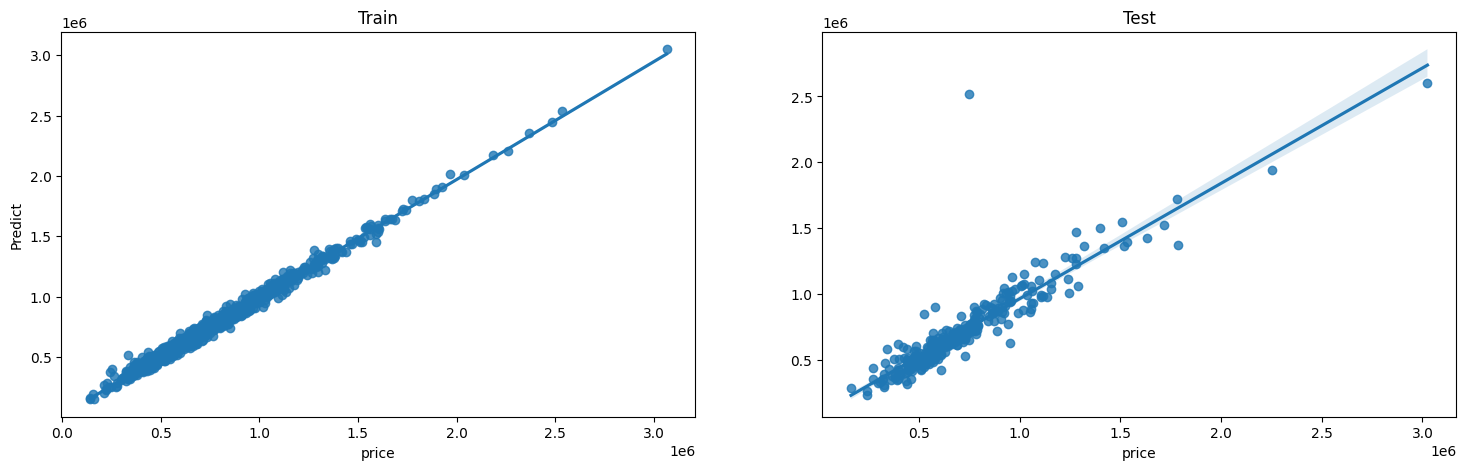

In [22]:
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

In [23]:
def adjusted_r2(y_expected, y_predict, X_train):
    R2 = r2_score(y_expected, y_predict)
    N = len(y_expected)
    p = X_train.shape[1]

    adjusted_r2 = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
    return adjusted_r2

adjusted_r2 = adjusted_r2(y_test, y_pred_test, X_train)
print('R2 Ajustado:', adjusted_r2)

mae = mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE:', mse)

rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE:', rmse)

rmsle = mean_squared_log_error(y_test, y_pred_test, squared=False)
print('RMSLE:', rmsle)

m_error = max_error(y_test, y_pred_test)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)


R2 Ajustado: 0.8026591461505055
MAE: 68000.82595696872
MSE: 18818160990.239384
RMSE: 137179.3023390897
RMSLE: 0.14695792296624724
Max Error: 1769442.423498673
MAPE: 0.10128299225724308


## Feature Selection

In [24]:
X_train_transformed = data_tree_pipe.fit_transform(X_train)
X_test_transformed  = data_tree_pipe.transform(X_test)

shuffle = SelectByShuffling(estimator=CatBoostRegressor(), scoring='neg_mean_absolute_error', cv=5)

shuffle.fit(X_train_transformed, y_train)

print(f"Number of variables before removal: {X_train_transformed.shape[1]}")
print(f"Number of variables to be removed: {len(shuffle.features_to_drop_)}")
print(f"Number of variables after removal: {X_train_transformed.shape[1] - len(shuffle.features_to_drop_)}")

X_train_transformed_reduced = shuffle.transform(X_train_transformed)
X_test_transformed_reduced  = shuffle.transform(X_test_transformed)

catboost = CatBoostRegressor(random_state=42)

catboost.fit(X_train_transformed_reduced, y_train)

y_pred_train = catboost.predict(X_train_transformed_reduced)
y_pred_test  = catboost.predict(X_test_transformed_reduced)

Learning rate set to 0.04049
0:	learn: 319997.2276276	total: 2.02ms	remaining: 2.02s
1:	learn: 312278.8233433	total: 2.9ms	remaining: 1.45s
2:	learn: 304350.0499934	total: 3.67ms	remaining: 1.22s
3:	learn: 297113.9905530	total: 4.6ms	remaining: 1.14s
4:	learn: 290740.8760274	total: 5.31ms	remaining: 1.06s
5:	learn: 283371.5309704	total: 5.97ms	remaining: 989ms
6:	learn: 277011.6796115	total: 6.72ms	remaining: 953ms
7:	learn: 270848.1091258	total: 7.49ms	remaining: 929ms
8:	learn: 264951.7823403	total: 8.17ms	remaining: 900ms
9:	learn: 259507.3753545	total: 9.06ms	remaining: 897ms
10:	learn: 254168.4497706	total: 9.66ms	remaining: 869ms
11:	learn: 248507.3777491	total: 10.3ms	remaining: 848ms
12:	learn: 243703.8644194	total: 10.9ms	remaining: 825ms
13:	learn: 238666.8420964	total: 11.4ms	remaining: 805ms
14:	learn: 233732.0763033	total: 12ms	remaining: 788ms
15:	learn: 229031.4336643	total: 12.6ms	remaining: 774ms
16:	learn: 224282.8228828	total: 13.3ms	remaining: 766ms
17:	learn: 21986

233:	learn: 78628.7865747	total: 150ms	remaining: 492ms
234:	learn: 78570.8762945	total: 151ms	remaining: 492ms
235:	learn: 78324.0510574	total: 152ms	remaining: 492ms
236:	learn: 78158.6252789	total: 152ms	remaining: 491ms
237:	learn: 78021.1852253	total: 153ms	remaining: 490ms
238:	learn: 77843.8065149	total: 154ms	remaining: 489ms
239:	learn: 77662.8249331	total: 154ms	remaining: 489ms
240:	learn: 77489.1043872	total: 155ms	remaining: 488ms
241:	learn: 77305.8209332	total: 155ms	remaining: 487ms
242:	learn: 77218.8226364	total: 156ms	remaining: 486ms
243:	learn: 77180.4369874	total: 157ms	remaining: 485ms
244:	learn: 77058.4977306	total: 157ms	remaining: 484ms
245:	learn: 76900.0431869	total: 158ms	remaining: 483ms
246:	learn: 76744.5600270	total: 158ms	remaining: 482ms
247:	learn: 76591.2130371	total: 159ms	remaining: 482ms
248:	learn: 76371.9129962	total: 160ms	remaining: 481ms
249:	learn: 76258.8126375	total: 160ms	remaining: 480ms
250:	learn: 76118.0227929	total: 161ms	remaining

525:	learn: 52107.8469532	total: 343ms	remaining: 309ms
526:	learn: 52026.8745457	total: 344ms	remaining: 308ms
527:	learn: 51951.5320630	total: 344ms	remaining: 308ms
528:	learn: 51856.2048227	total: 345ms	remaining: 307ms
529:	learn: 51789.6792927	total: 345ms	remaining: 306ms
530:	learn: 51709.0549335	total: 346ms	remaining: 306ms
531:	learn: 51646.4362143	total: 347ms	remaining: 305ms
532:	learn: 51582.7913441	total: 347ms	remaining: 304ms
533:	learn: 51517.0799382	total: 348ms	remaining: 303ms
534:	learn: 51391.6973462	total: 348ms	remaining: 303ms
535:	learn: 51354.7033026	total: 349ms	remaining: 302ms
536:	learn: 51301.6782202	total: 350ms	remaining: 301ms
537:	learn: 51260.8813770	total: 350ms	remaining: 301ms
538:	learn: 51148.7160073	total: 351ms	remaining: 300ms
539:	learn: 51109.4949442	total: 351ms	remaining: 299ms
540:	learn: 51085.7992962	total: 352ms	remaining: 298ms
541:	learn: 51028.4407924	total: 352ms	remaining: 298ms
542:	learn: 50998.7163306	total: 353ms	remaining

822:	learn: 35961.8647211	total: 535ms	remaining: 115ms
823:	learn: 35916.9849064	total: 536ms	remaining: 114ms
824:	learn: 35905.4904932	total: 537ms	remaining: 114ms
825:	learn: 35879.3864967	total: 537ms	remaining: 113ms
826:	learn: 35838.9516076	total: 538ms	remaining: 113ms
827:	learn: 35821.5571120	total: 538ms	remaining: 112ms
828:	learn: 35792.4894753	total: 539ms	remaining: 111ms
829:	learn: 35769.4525725	total: 540ms	remaining: 111ms
830:	learn: 35743.4916623	total: 540ms	remaining: 110ms
831:	learn: 35687.1452964	total: 541ms	remaining: 109ms
832:	learn: 35645.8492924	total: 541ms	remaining: 109ms
833:	learn: 35625.8339940	total: 542ms	remaining: 108ms
834:	learn: 35587.0604447	total: 542ms	remaining: 107ms
835:	learn: 35566.4418494	total: 543ms	remaining: 107ms
836:	learn: 35520.5133929	total: 544ms	remaining: 106ms
837:	learn: 35482.0235956	total: 545ms	remaining: 105ms
838:	learn: 35453.1132630	total: 545ms	remaining: 105ms
839:	learn: 35428.6362023	total: 546ms	remaining

90:	learn: 103912.0009416	total: 60.7ms	remaining: 607ms
91:	learn: 103554.7895583	total: 61.6ms	remaining: 608ms
92:	learn: 103069.8750151	total: 62.2ms	remaining: 606ms
93:	learn: 102586.4517660	total: 62.7ms	remaining: 604ms
94:	learn: 102221.2827303	total: 63.3ms	remaining: 603ms
95:	learn: 101867.8930750	total: 63.9ms	remaining: 601ms
96:	learn: 101537.1390803	total: 64.5ms	remaining: 600ms
97:	learn: 101123.0755686	total: 65.1ms	remaining: 599ms
98:	learn: 100675.8077489	total: 65.7ms	remaining: 598ms
99:	learn: 100428.4156401	total: 66.2ms	remaining: 596ms
100:	learn: 99954.1901182	total: 66.8ms	remaining: 595ms
101:	learn: 99481.8547359	total: 67.3ms	remaining: 593ms
102:	learn: 99194.3477681	total: 67.9ms	remaining: 591ms
103:	learn: 98934.4144307	total: 68.4ms	remaining: 590ms
104:	learn: 98677.2254895	total: 69ms	remaining: 588ms
105:	learn: 98448.4458670	total: 69.6ms	remaining: 587ms
106:	learn: 98177.7564631	total: 70.2ms	remaining: 586ms
107:	learn: 97907.5988528	total: 

388:	learn: 60103.5710227	total: 253ms	remaining: 397ms
389:	learn: 60067.8130704	total: 254ms	remaining: 397ms
390:	learn: 60022.4470050	total: 255ms	remaining: 396ms
391:	learn: 59921.3348251	total: 255ms	remaining: 396ms
392:	learn: 59893.0088430	total: 256ms	remaining: 395ms
393:	learn: 59749.3104979	total: 256ms	remaining: 394ms
394:	learn: 59653.8556777	total: 257ms	remaining: 393ms
395:	learn: 59583.1803205	total: 257ms	remaining: 393ms
396:	learn: 59482.3043790	total: 258ms	remaining: 392ms
397:	learn: 59464.3724895	total: 258ms	remaining: 391ms
398:	learn: 59351.4468723	total: 259ms	remaining: 390ms
399:	learn: 59260.9017789	total: 260ms	remaining: 389ms
400:	learn: 59194.7622058	total: 260ms	remaining: 389ms
401:	learn: 59064.4880008	total: 261ms	remaining: 388ms
402:	learn: 59045.6058434	total: 262ms	remaining: 388ms
403:	learn: 59017.7038365	total: 263ms	remaining: 387ms
404:	learn: 58968.5872243	total: 263ms	remaining: 387ms
405:	learn: 58809.8149191	total: 264ms	remaining

679:	learn: 41282.6568438	total: 446ms	remaining: 210ms
680:	learn: 41244.5048693	total: 447ms	remaining: 209ms
681:	learn: 41215.9680199	total: 447ms	remaining: 209ms
682:	learn: 41190.9318046	total: 448ms	remaining: 208ms
683:	learn: 41126.6810495	total: 449ms	remaining: 207ms
684:	learn: 41043.9825070	total: 449ms	remaining: 207ms
685:	learn: 40989.8345552	total: 450ms	remaining: 206ms
686:	learn: 40963.6749185	total: 450ms	remaining: 205ms
687:	learn: 40931.5634252	total: 451ms	remaining: 204ms
688:	learn: 40907.2877512	total: 451ms	remaining: 204ms
689:	learn: 40885.2514160	total: 452ms	remaining: 203ms
690:	learn: 40835.8337717	total: 453ms	remaining: 202ms
691:	learn: 40783.5998376	total: 453ms	remaining: 202ms
692:	learn: 40743.7725477	total: 454ms	remaining: 201ms
693:	learn: 40689.8338461	total: 454ms	remaining: 200ms
694:	learn: 40639.3390280	total: 455ms	remaining: 200ms
695:	learn: 40599.6778048	total: 455ms	remaining: 199ms
696:	learn: 40565.2290293	total: 456ms	remaining

976:	learn: 30236.2108504	total: 639ms	remaining: 15ms
977:	learn: 30208.0881048	total: 640ms	remaining: 14.4ms
978:	learn: 30155.1734422	total: 640ms	remaining: 13.7ms
979:	learn: 30110.9535556	total: 641ms	remaining: 13.1ms
980:	learn: 30099.8193963	total: 642ms	remaining: 12.4ms
981:	learn: 30087.2990460	total: 642ms	remaining: 11.8ms
982:	learn: 30053.3048419	total: 643ms	remaining: 11.1ms
983:	learn: 30036.8796734	total: 643ms	remaining: 10.5ms
984:	learn: 30033.6233243	total: 644ms	remaining: 9.8ms
985:	learn: 29999.1454688	total: 644ms	remaining: 9.15ms
986:	learn: 29966.5245403	total: 645ms	remaining: 8.49ms
987:	learn: 29944.6426778	total: 645ms	remaining: 7.84ms
988:	learn: 29921.3568743	total: 646ms	remaining: 7.18ms
989:	learn: 29879.7204444	total: 647ms	remaining: 6.53ms
990:	learn: 29843.5277939	total: 647ms	remaining: 5.88ms
991:	learn: 29837.1278165	total: 648ms	remaining: 5.22ms
992:	learn: 29822.5090269	total: 648ms	remaining: 4.57ms
993:	learn: 29771.1896215	total: 6

263:	learn: 72329.1717842	total: 166ms	remaining: 464ms
264:	learn: 72202.4841368	total: 167ms	remaining: 463ms
265:	learn: 72072.4238493	total: 168ms	remaining: 463ms
266:	learn: 71987.6641622	total: 168ms	remaining: 462ms
267:	learn: 71872.4381132	total: 169ms	remaining: 461ms
268:	learn: 71778.8299576	total: 170ms	remaining: 461ms
269:	learn: 71642.0073843	total: 170ms	remaining: 461ms
270:	learn: 71431.9227338	total: 171ms	remaining: 460ms
271:	learn: 71370.1679622	total: 172ms	remaining: 459ms
272:	learn: 71306.9571039	total: 172ms	remaining: 459ms
273:	learn: 71201.6169456	total: 173ms	remaining: 458ms
274:	learn: 71118.1000707	total: 174ms	remaining: 458ms
275:	learn: 71054.7243418	total: 174ms	remaining: 457ms
276:	learn: 71015.0205034	total: 175ms	remaining: 456ms
277:	learn: 70926.0277468	total: 175ms	remaining: 455ms
278:	learn: 70742.3898023	total: 176ms	remaining: 455ms
279:	learn: 70605.4961141	total: 177ms	remaining: 454ms
280:	learn: 70492.5554660	total: 177ms	remaining

559:	learn: 45719.5689404	total: 359ms	remaining: 282ms
560:	learn: 45630.9306893	total: 360ms	remaining: 282ms
561:	learn: 45596.7538261	total: 361ms	remaining: 281ms
562:	learn: 45537.7367753	total: 361ms	remaining: 280ms
563:	learn: 45475.6685044	total: 362ms	remaining: 280ms
564:	learn: 45423.4765288	total: 362ms	remaining: 279ms
565:	learn: 45357.7689993	total: 363ms	remaining: 278ms
566:	learn: 45300.4819367	total: 364ms	remaining: 278ms
567:	learn: 45293.2102433	total: 364ms	remaining: 277ms
568:	learn: 45207.5912213	total: 365ms	remaining: 276ms
569:	learn: 45125.2007220	total: 365ms	remaining: 276ms
570:	learn: 45102.7572068	total: 366ms	remaining: 275ms
571:	learn: 45072.9876738	total: 367ms	remaining: 274ms
572:	learn: 45065.9341042	total: 367ms	remaining: 274ms
573:	learn: 44998.2120730	total: 368ms	remaining: 273ms
574:	learn: 44932.5990933	total: 369ms	remaining: 273ms
575:	learn: 44873.3410080	total: 369ms	remaining: 272ms
576:	learn: 44849.0510987	total: 370ms	remaining

852:	learn: 33398.0077692	total: 552ms	remaining: 95.1ms
853:	learn: 33387.2326178	total: 552ms	remaining: 94.4ms
854:	learn: 33356.0072105	total: 553ms	remaining: 93.8ms
855:	learn: 33340.4249158	total: 554ms	remaining: 93.1ms
856:	learn: 33293.8374127	total: 554ms	remaining: 92.5ms
857:	learn: 33256.1715984	total: 555ms	remaining: 91.8ms
858:	learn: 33201.3180386	total: 555ms	remaining: 91.2ms
859:	learn: 33184.3357403	total: 556ms	remaining: 90.5ms
860:	learn: 33125.9780371	total: 557ms	remaining: 89.8ms
861:	learn: 33116.0056756	total: 557ms	remaining: 89.2ms
862:	learn: 33068.9936641	total: 558ms	remaining: 88.5ms
863:	learn: 33035.1532790	total: 558ms	remaining: 87.9ms
864:	learn: 33001.8190271	total: 559ms	remaining: 87.2ms
865:	learn: 32984.8754954	total: 559ms	remaining: 86.6ms
866:	learn: 32936.4865998	total: 560ms	remaining: 85.9ms
867:	learn: 32910.7495935	total: 561ms	remaining: 85.3ms
868:	learn: 32903.5644397	total: 561ms	remaining: 84.6ms
869:	learn: 32856.4192199	total

132:	learn: 93488.0984248	total: 84.5ms	remaining: 551ms
133:	learn: 93289.6074328	total: 85.5ms	remaining: 552ms
134:	learn: 93072.3828581	total: 86.1ms	remaining: 552ms
135:	learn: 92878.4276897	total: 86.7ms	remaining: 551ms
136:	learn: 92684.0683783	total: 87.3ms	remaining: 550ms
137:	learn: 92477.0312501	total: 87.9ms	remaining: 549ms
138:	learn: 92280.6835599	total: 88.4ms	remaining: 548ms
139:	learn: 92065.4012857	total: 89ms	remaining: 547ms
140:	learn: 91902.9801140	total: 89.8ms	remaining: 547ms
141:	learn: 91541.9880526	total: 90.3ms	remaining: 546ms
142:	learn: 91342.3369243	total: 90.9ms	remaining: 545ms
143:	learn: 91120.1656976	total: 91.5ms	remaining: 544ms
144:	learn: 90929.1280854	total: 92.1ms	remaining: 543ms
145:	learn: 90816.3880904	total: 92.7ms	remaining: 542ms
146:	learn: 90538.5374438	total: 93.5ms	remaining: 542ms
147:	learn: 90322.5968827	total: 94.2ms	remaining: 542ms
148:	learn: 90071.8949246	total: 94.9ms	remaining: 542ms
149:	learn: 90007.9105747	total: 

426:	learn: 60421.4921151	total: 276ms	remaining: 371ms
427:	learn: 60314.0103769	total: 277ms	remaining: 371ms
428:	learn: 60229.7422190	total: 278ms	remaining: 370ms
429:	learn: 60135.6703025	total: 279ms	remaining: 369ms
430:	learn: 60062.1248021	total: 279ms	remaining: 369ms
431:	learn: 60002.2347278	total: 280ms	remaining: 368ms
432:	learn: 59920.7124260	total: 280ms	remaining: 367ms
433:	learn: 59829.1619365	total: 281ms	remaining: 366ms
434:	learn: 59781.2250788	total: 282ms	remaining: 366ms
435:	learn: 59715.2549418	total: 282ms	remaining: 365ms
436:	learn: 59665.2101155	total: 283ms	remaining: 364ms
437:	learn: 59636.2274343	total: 283ms	remaining: 364ms
438:	learn: 59524.1195565	total: 284ms	remaining: 363ms
439:	learn: 59402.3751082	total: 284ms	remaining: 362ms
440:	learn: 59371.3656151	total: 285ms	remaining: 361ms
441:	learn: 59290.3770535	total: 286ms	remaining: 361ms
442:	learn: 59221.8630508	total: 286ms	remaining: 360ms
443:	learn: 59105.7321378	total: 287ms	remaining

720:	learn: 41762.0488898	total: 468ms	remaining: 181ms
721:	learn: 41710.7772632	total: 469ms	remaining: 180ms
722:	learn: 41673.7840155	total: 469ms	remaining: 180ms
723:	learn: 41654.7887692	total: 470ms	remaining: 179ms
724:	learn: 41604.8837346	total: 471ms	remaining: 179ms
725:	learn: 41555.9720832	total: 471ms	remaining: 178ms
726:	learn: 41515.6943697	total: 472ms	remaining: 177ms
727:	learn: 41438.5236251	total: 472ms	remaining: 176ms
728:	learn: 41384.3460055	total: 473ms	remaining: 176ms
729:	learn: 41331.0046685	total: 474ms	remaining: 175ms
730:	learn: 41277.6851983	total: 474ms	remaining: 174ms
731:	learn: 41214.0163654	total: 475ms	remaining: 174ms
732:	learn: 41136.3445137	total: 475ms	remaining: 173ms
733:	learn: 41082.0949124	total: 476ms	remaining: 172ms
734:	learn: 41034.8822529	total: 477ms	remaining: 172ms
735:	learn: 41006.5141477	total: 477ms	remaining: 171ms
736:	learn: 40974.0604421	total: 478ms	remaining: 170ms
737:	learn: 40941.2853228	total: 478ms	remaining

Learning rate set to 0.040497
0:	learn: 309995.1002052	total: 914us	remaining: 913ms
1:	learn: 302221.8708223	total: 1.53ms	remaining: 762ms
2:	learn: 294463.7453280	total: 2.09ms	remaining: 695ms
3:	learn: 287430.1639033	total: 2.67ms	remaining: 666ms
4:	learn: 281070.5842215	total: 3.28ms	remaining: 653ms
5:	learn: 273825.9062532	total: 3.86ms	remaining: 640ms
6:	learn: 267434.3045932	total: 4.49ms	remaining: 637ms
7:	learn: 261363.2981406	total: 5.03ms	remaining: 624ms
8:	learn: 255616.1395165	total: 5.69ms	remaining: 626ms
9:	learn: 249561.9772330	total: 6.27ms	remaining: 621ms
10:	learn: 244509.9265103	total: 6.79ms	remaining: 611ms
11:	learn: 238964.0761010	total: 7.38ms	remaining: 607ms
12:	learn: 234078.2256967	total: 7.92ms	remaining: 602ms
13:	learn: 228700.5743779	total: 8.55ms	remaining: 602ms
14:	learn: 223978.1006658	total: 9.11ms	remaining: 598ms
15:	learn: 219048.0345775	total: 9.7ms	remaining: 597ms
16:	learn: 214680.9703945	total: 10.3ms	remaining: 595ms
17:	learn: 21

289:	learn: 70556.5054668	total: 193ms	remaining: 472ms
290:	learn: 70318.1968158	total: 193ms	remaining: 471ms
291:	learn: 70167.5121976	total: 194ms	remaining: 471ms
292:	learn: 70029.3626856	total: 195ms	remaining: 470ms
293:	learn: 69849.1102470	total: 195ms	remaining: 469ms
294:	learn: 69806.0855294	total: 196ms	remaining: 468ms
295:	learn: 69786.6256859	total: 197ms	remaining: 468ms
296:	learn: 69679.3974804	total: 197ms	remaining: 467ms
297:	learn: 69516.9137392	total: 198ms	remaining: 466ms
298:	learn: 69318.9359418	total: 198ms	remaining: 465ms
299:	learn: 69247.4898931	total: 199ms	remaining: 464ms
300:	learn: 69174.8308249	total: 200ms	remaining: 463ms
301:	learn: 69009.1309586	total: 200ms	remaining: 463ms
302:	learn: 68989.8677749	total: 201ms	remaining: 462ms
303:	learn: 68927.8307498	total: 201ms	remaining: 461ms
304:	learn: 68883.8470531	total: 202ms	remaining: 460ms
305:	learn: 68748.2953970	total: 203ms	remaining: 459ms
306:	learn: 68730.1813698	total: 203ms	remaining

586:	learn: 45971.9153465	total: 386ms	remaining: 272ms
587:	learn: 45954.3884098	total: 387ms	remaining: 271ms
588:	learn: 45871.8679383	total: 388ms	remaining: 270ms
589:	learn: 45833.2880001	total: 388ms	remaining: 270ms
590:	learn: 45799.7043428	total: 389ms	remaining: 269ms
591:	learn: 45730.4065038	total: 389ms	remaining: 268ms
592:	learn: 45724.7085207	total: 390ms	remaining: 268ms
593:	learn: 45662.0097810	total: 391ms	remaining: 267ms
594:	learn: 45608.6570652	total: 391ms	remaining: 266ms
595:	learn: 45536.4739557	total: 392ms	remaining: 266ms
596:	learn: 45507.4077299	total: 392ms	remaining: 265ms
597:	learn: 45489.4063839	total: 393ms	remaining: 264ms
598:	learn: 45412.4273403	total: 394ms	remaining: 264ms
599:	learn: 45351.2945557	total: 394ms	remaining: 263ms
600:	learn: 45344.7054387	total: 395ms	remaining: 262ms
601:	learn: 45275.4092499	total: 395ms	remaining: 261ms
602:	learn: 45269.6316341	total: 396ms	remaining: 261ms
603:	learn: 45207.6698339	total: 397ms	remaining

879:	learn: 33815.9825466	total: 579ms	remaining: 79ms
880:	learn: 33786.4188196	total: 580ms	remaining: 78.3ms
881:	learn: 33782.9361872	total: 580ms	remaining: 77.6ms
882:	learn: 33751.8922713	total: 581ms	remaining: 77ms
883:	learn: 33746.5204351	total: 582ms	remaining: 76.3ms
884:	learn: 33709.1910522	total: 582ms	remaining: 75.6ms
885:	learn: 33703.9869580	total: 583ms	remaining: 75ms
886:	learn: 33660.0784217	total: 583ms	remaining: 74.3ms
887:	learn: 33628.9785732	total: 584ms	remaining: 73.6ms
888:	learn: 33593.2590599	total: 584ms	remaining: 73ms
889:	learn: 33547.3976361	total: 585ms	remaining: 72.3ms
890:	learn: 33544.6729995	total: 586ms	remaining: 71.7ms
891:	learn: 33527.0910268	total: 586ms	remaining: 71ms
892:	learn: 33478.5792022	total: 587ms	remaining: 70.3ms
893:	learn: 33460.2494891	total: 588ms	remaining: 69.7ms
894:	learn: 33415.6120930	total: 588ms	remaining: 69ms
895:	learn: 33369.3882053	total: 589ms	remaining: 68.4ms
896:	learn: 33347.4378479	total: 590ms	rema

412:	learn: 69077.5344261	total: 177ms	remaining: 251ms
413:	learn: 69027.2207501	total: 177ms	remaining: 251ms
414:	learn: 68952.1096137	total: 178ms	remaining: 251ms
415:	learn: 68918.7273151	total: 178ms	remaining: 251ms
416:	learn: 68850.4370962	total: 179ms	remaining: 250ms
417:	learn: 68809.7720892	total: 179ms	remaining: 250ms
418:	learn: 68768.0536219	total: 180ms	remaining: 250ms
419:	learn: 68743.7845816	total: 180ms	remaining: 249ms
420:	learn: 68685.5766744	total: 181ms	remaining: 249ms
421:	learn: 68584.7333070	total: 181ms	remaining: 248ms
422:	learn: 68568.1611089	total: 182ms	remaining: 248ms
423:	learn: 68474.0990223	total: 182ms	remaining: 247ms
424:	learn: 68400.4572262	total: 182ms	remaining: 247ms
425:	learn: 68350.6179144	total: 183ms	remaining: 246ms
426:	learn: 68280.0253415	total: 183ms	remaining: 246ms
427:	learn: 68203.3237178	total: 184ms	remaining: 245ms
428:	learn: 68155.8566683	total: 184ms	remaining: 245ms
429:	learn: 68040.8948434	total: 184ms	remaining

837:	learn: 50010.7916584	total: 367ms	remaining: 70.9ms
838:	learn: 49981.2371046	total: 367ms	remaining: 70.5ms
839:	learn: 49951.4596002	total: 368ms	remaining: 70.1ms
840:	learn: 49926.2627643	total: 368ms	remaining: 69.6ms
841:	learn: 49886.8924705	total: 369ms	remaining: 69.2ms
842:	learn: 49843.9132973	total: 369ms	remaining: 68.7ms
843:	learn: 49801.3220261	total: 369ms	remaining: 68.3ms
844:	learn: 49752.9348814	total: 370ms	remaining: 67.8ms
845:	learn: 49721.9582419	total: 370ms	remaining: 67.4ms
846:	learn: 49688.6109815	total: 371ms	remaining: 66.9ms
847:	learn: 49666.8192045	total: 371ms	remaining: 66.5ms
848:	learn: 49638.1760989	total: 371ms	remaining: 66.1ms
849:	learn: 49599.6715129	total: 372ms	remaining: 65.6ms
850:	learn: 49581.5651337	total: 372ms	remaining: 65.2ms
851:	learn: 49547.9202089	total: 373ms	remaining: 64.7ms
852:	learn: 49525.6705881	total: 373ms	remaining: 64.3ms
853:	learn: 49496.2681079	total: 373ms	remaining: 63.8ms
854:	learn: 49462.7033483	total

In [26]:
# Define adjusted R² function
def adjusted_r2(y_test, y_pred, X_train):
    n = len(y_test)  # Number of observations
    p = X_train.shape[1]  # Number of independent variables
    r2 = r2_score(y_test, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Example calculations
adjusted_r2_value = adjusted_r2(y_test, y_pred_test, X_train)
print('R² Adjusted:', adjusted_r2_value)

mae = mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE:', mse)

rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE:', rmse)

rmsle = mean_squared_log_error(y_test, y_pred_test, squared=False)
print('RMSLE:', rmsle)

m_error = max_error(y_test, y_pred_test)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)

R² Adjusted: 0.8608259498047968
MAE: 66147.75150782
MSE: 13271452064.530012
RMSE: 115201.78846063984
RMSLE: 0.1463612305378902
Max Error: 1166498.1463721767
MAPE: 0.10021452522888735


In [ ]:
#